In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics as stat
from scipy import stats
import scipy

In [2]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [3]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 72E3-1983

 Directory of C:\Users\kulde\ExcelR\Assignment Practice\Simple Linear Regression

09-11-2022  17:17    <DIR>          .
03-11-2022  12:17    <DIR>          ..
07-11-2022  09:21    <DIR>          .ipynb_checkpoints
04-11-2022  18:05               218 delivery_time.csv
07-11-2022  10:34           116,262 Delivery_time.ipynb
04-11-2022  18:05               318 Problem_statements.txt
04-11-2022  18:05               454 Salary_Data.csv
09-11-2022  17:17            56,897 Salary_Data.ipynb
               5 File(s)        174,149 bytes
               3 Dir(s)  356,939,984,896 bytes free


In [4]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
delivery_time=pd.read_csv("delivery_time.csv")
delivery_time.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [7]:
delivery_time_r = delivery_time.rename({'Sorting Time': 'Sorting_Time', 'Delivery Time': 'Delivery_Time'}, axis=1)
delivery_time_r.head(2)

,Delivery_Time,Sorting_Time
0,21.0,10
1,13.5,4


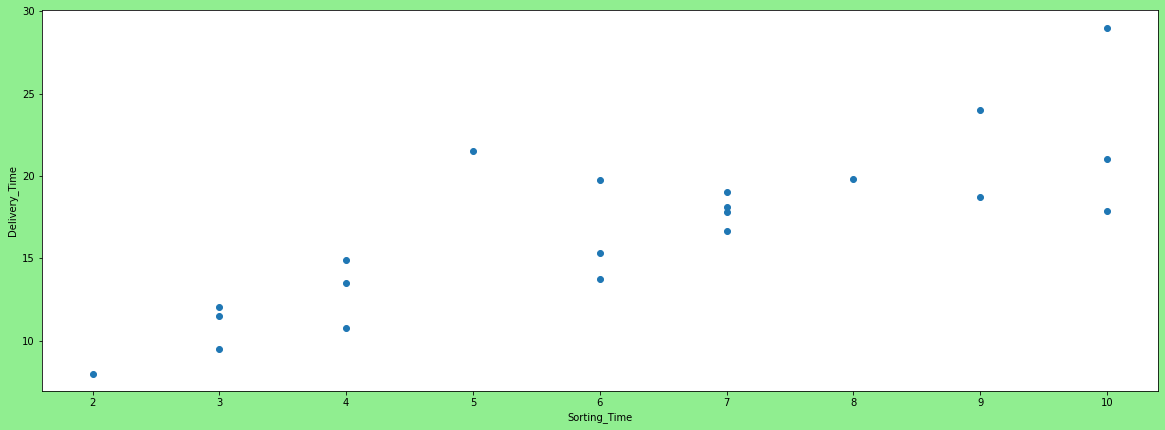

In [8]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(delivery_time_r["Sorting_Time"],delivery_time_r["Delivery_Time"])
plt.xlabel("Sorting_Time");
plt.ylabel("Delivery_Time")
plt.show()

In [9]:
delivery_time_r.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [10]:
delivery_time_r.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
lm = LinearRegression()
lm

LinearRegression()

In [12]:
X = delivery_time_r["Sorting_Time"].values.reshape(-1,1)
Y = delivery_time_r["Delivery_Time"].values.reshape(-1,1)

lm.fit(X,Y)


LinearRegression()

In [13]:
print (lm.coef_)#alpha 
print (lm.intercept_)#beta

[[1.6490199]]
[6.58273397]


In [14]:
lm.predict(X)

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

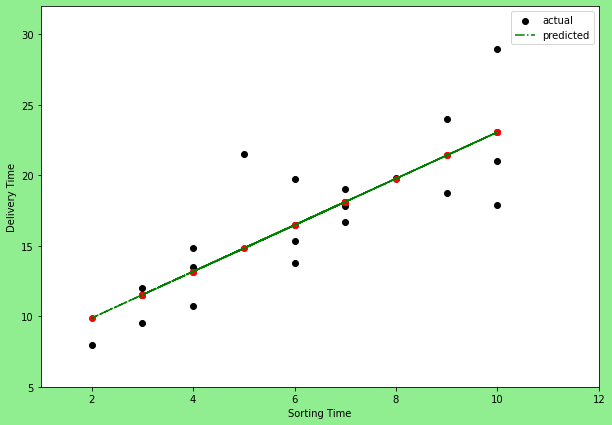

In [15]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(delivery_time_r["Sorting_Time"],(delivery_time_r["Delivery_Time"]),color="black",label="actual");
plt.plot(delivery_time_r["Sorting_Time"],lm.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(delivery_time_r["Sorting_Time"],lm.predict(X),color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")
plt.xlim(1,12)
plt.ylim(5,+32)
plt.legend(loc="best")
plt.show()

In [16]:
pred_train_lm =lm.predict(X)
r2_score(delivery_time_r["Delivery_Time"],pred_train_lm)


0.6822714748417231

In [17]:
first_model = smf.ols("Delivery_Time~Sorting_Time",data=delivery_time_r).fit()

In [18]:
first_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [19]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        17:19:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
first_model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [21]:
first_model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

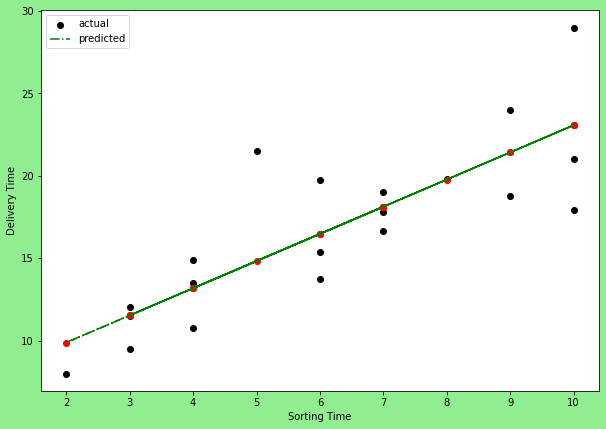

In [22]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(delivery_time_r["Sorting_Time"],(delivery_time_r["Delivery_Time"]),color="black",label="actual");
plt.plot(delivery_time_r["Sorting_Time"],lm.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(delivery_time_r["Sorting_Time"],lm.predict(X),color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")

plt.legend(loc="best")
plt.show()

In [23]:
model2 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data=delivery_time_r).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        17:19:52   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model3 = smf.ols('np.log(Delivery_Time)~(Sorting_Time)',data=delivery_time_r).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 09 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                           17:19:58   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
delivery_time_r["Sorting_Time_sq"] = delivery_time_r.Sorting_Time**2
model_quad = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_Time_sq",data=delivery_time_r).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Wed, 09 Nov 2022   Prob (F-statistic):           2.20e-06
Time:                           17:20:00   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time        0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_Time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
delivery_time_r

,Delivery_Time,Sorting_Time,Sorting_Time_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [26]:
# TO GET THE BEST  MODEL I TRIED FOUR MODELS IN WHICH FORTH MODEL IS BEST, HAVING R^2 76.50% and P VALUE IS ALSO LEAST.